In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
import zipline

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [56]:
import glob
import pybrain
import numpy as np
from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import FullConnection
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import random
import ast
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import glob
import pprint
import dateutil.parser
import pprint
import re
from sklearn import linear_model, datasets
import time
from sklearn.naive_bayes import GaussianNB
import nltk
from collections import defaultdict
from sklearn import svm
pp = pprint.PrettyPrinter(indent=4)
import gevent.monkey
gevent.monkey.patch_socket()
import numpy
import time
import sqlalchemy
from sqlalchemy import *
from sqlalchemy import event
from sqlalchemy.dialects.mysql import LONGTEXT
import sqlite3
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import *
import urllib2
import urllib
import json
import pprint
import dateutil.parser
import gevent
import datetime
import marshal
from pylearn2.datasets.dense_design_matrix import DenseDesignMatrix

from __future__ import division
import os

import pylearn2
import numpy as np
from pylearn2.train import Train
from pylearn2.datasets.mnist import MNIST
from pylearn2.models import softmax_regression, mlp, svm
from pylearn2.training_algorithms import bgd, sgd
from pylearn2.termination_criteria import MonitorBased, EpochCounter
from pylearn2.train_extensions import best_params, live_monitoring
from pylearn2.utils import serial
from pylearn2.costs.mlp.dropout import Dropout
from pylearn2.costs.mlp import WeightDecay
from theano import function
from theano import tensor as T
import cPickle as pickle
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pytz

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_bars_from_yahoo
from zipline.api import order_target, record, symbol, history, add_history, order

In [3]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

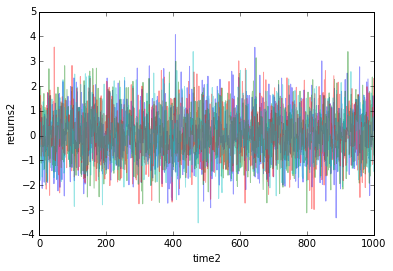

In [4]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time2')
plt.ylabel('returns2')

In [5]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.05519002  0.47670037  0.16928577  0.29882384]
[ 0.38504115  0.36449262  0.22988212  0.02058411]


In [6]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [7]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in xrange(n_portfolios)
])

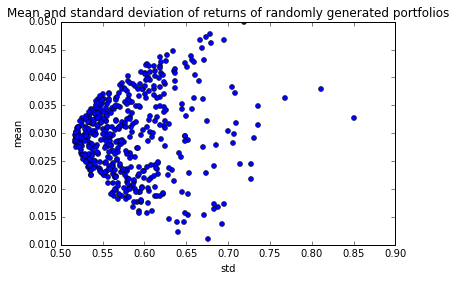

In [8]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

In [155]:
return_vec

array([[ 0.9584009 ,  0.46015911, -0.4527822 , ...,  1.60813813,
         0.6053286 ,  0.20538604],
       [-1.18204984, -0.1640271 ,  1.43588011, ..., -0.17597753,
        -0.12009332, -0.7810634 ],
       [-1.64005894,  0.04585091,  1.07821184, ..., -0.6609387 ,
         0.09155997,  2.29757514],
       [ 0.14370354, -0.94380362, -1.81566659, ..., -0.47056918,
         0.75912735, -1.43771428]])

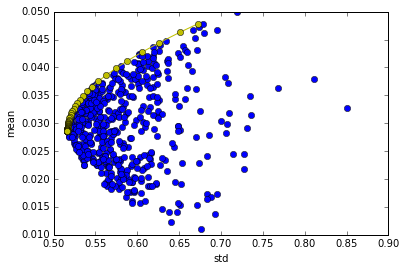

In [9]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

In [10]:
print(weights)

[[  1.96246645e-01]
 [  7.38361973e-10]
 [  8.03752249e-01]
 [  1.10500474e-06]]


In [22]:
import csv
import urllib2

url = "http://cdn1.indicatorguys.com/downloads/sp500-symbol-list.txt"
response = urllib2.urlopen(url)
cr = csv.reader(response)

sp500 = []

for row in cr:
    sp500.append(row[0].strip("'"))

TypeError: list indices must be integers, not str

In [113]:
start = datetime.datetime(2012, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime.datetime(2014, 1, 1, 0, 0, 0, 0, pytz.utc)
sp500data = load_bars_from_yahoo(stocks=sp500[:60], start=start,
                            end=end).fillna(method='ffill').fillna(method='bfill')

A
AA
AAPL
ABC
ABT
ACE
ACN
ADBE
ADI
ADM
ADP
ADSK
ADT
AEE
AEP
AES
AET
AFL
AGN
AIG
AIV
AIZ
AKAM
ALL
ALTR
ALXN
AMAT
AMD
AMGN
AMP
AMT
AMZN
AN
ANF
AON
APA
APC
APD
APH
APOL
ARG
ATI
AVB
AVP
AVY
AXP
AZO
BA
BAC
BAX
BBBY
BBT
BBY
BCR
BDX
BEAM
BEN
BF.B
BHI
BIG


In [116]:
train_data = data = sp500data[:, \
        datetime.datetime(2012, 1, 1, 0, 0, 0, 0, pytz.utc):datetime.datetime(2013, 1, 1, 0, 0, 0, 0, pytz.utc)]

In [117]:
print(train_data['AAPL'])

                                open       high        low  close     volume  \
Date                                                                           
2012-01-02 00:00:00+00:00  55.163422  55.581122  55.109525  55.41   75555200   
2012-01-03 00:00:00+00:00  55.163422  55.581122  55.109525  55.41   75555200   
2012-01-04 00:00:00+00:00  55.246469  55.877087  55.149450  55.71   65005500   
2012-01-05 00:00:00+00:00  55.914967  56.400071  55.607734  56.33   67817400   
2012-01-06 00:00:00+00:00  56.565598  56.967164  56.491483  56.92   79573200   
2012-01-09 00:00:00+00:00  57.338024  57.641222  56.778793  56.83   98506100   
2012-01-10 00:00:00+00:00  57.389772  57.401900  56.795542  57.03   64549100   
2012-01-11 00:00:00+00:00  56.957518  56.980426  56.503399  56.94   53771200   
2012-01-12 00:00:00+00:00  56.899923  56.983464  56.424274  56.78   53146800   
2012-01-13 00:00:00+00:00  56.555177  56.656241  56.415036  56.57   56505400   
2012-01-16 00:00:00+00:00  56.555177  56

In [156]:
returns = []
risks = []
symbols = []
prices_normalized = []
for symbol, data in train_data.iteritems():
    symbols.append(symbol)
    prices = data['price']
    prices = prices / prices[0]
    prices_normalized.append(prices)
    returns.append(np.mean(np.diff(prices, 1)))
    #returns.append((prices[-1] - prices[0]) / prices[0])
    risks.append(np.std(prices))
prices_normalized = np.array(prices_normalized)

In [157]:
prices_normalized

array([[ 1.        ,  1.        ,  0.99210422, ...,  1.10264508,
         1.13343861,  1.13343861],
       [ 1.        ,  1.        ,  1.02362205, ...,  0.9336333 ,
         0.95275591,  0.95275591],
       [ 1.        ,  1.        ,  1.00541419, ...,  1.25031583,
         1.30572099,  1.30572099],
       ..., 
       [ 1.        ,  1.        ,  0.98366712, ...,  1.17305075,
         1.19560568,  1.19560568],
       [ 1.        ,  1.        ,  1.0099837 , ...,  0.79299104,
         0.81132844,  0.81132844],
       [ 1.        ,  1.        ,  1.01063547, ...,  0.72640255,
         0.74501462,  0.74501462]])

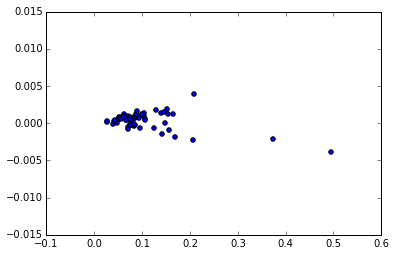

In [161]:
plt.scatter(risks, returns)

In [181]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [187]:
fancy = train_data[:,:,'price'].pct_change().dropna().T

In [182]:

opt_weights, opt_returns, opt_risks = optimal_portfolio(fancy)

In [206]:
fancy = train_data[:,:,'price'].pct_change().dropna().T
returns = fancy
n = len(returns)
returns = np.asmatrix(returns)

N = 100
mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
mus

[0.1,
 0.11220184543019636,
 0.12589254117941673,
 0.14125375446227545,
 0.15848931924611134,
 0.1778279410038923,
 0.19952623149688797,
 0.22387211385683395,
 0.251188643150958,
 0.28183829312644537,
 0.31622776601683794,
 0.35481338923357547,
 0.3981071705534972,
 0.44668359215096315,
 0.5011872336272722,
 0.5623413251903491,
 0.6309573444801934,
 0.7079457843841379,
 0.7943282347242815,
 0.8912509381337455,
 1.0,
 1.1220184543019636,
 1.2589254117941675,
 1.412537544622754,
 1.5848931924611134,
 1.7782794100389228,
 1.9952623149688797,
 2.23872113856834,
 2.5118864315095797,
 2.8183829312644537,
 3.1622776601683795,
 3.548133892335755,
 3.981071705534973,
 4.46683592150963,
 5.011872336272722,
 5.623413251903491,
 6.309573444801933,
 7.07945784384138,
 7.943282347242813,
 8.912509381337454,
 10.0,
 11.220184543019629,
 12.589254117941675,
 14.12537544622754,
 15.848931924611142,
 17.78279410038923,
 19.952623149688787,
 22.3872113856834,
 25.118864315095795,
 28.18382931264455,
 31.

In [200]:
fancy = train_data[:,:,'price'].pct_change().dropna().T
returns = fancy
n = len(returns)
returns = np.asmatrix(returns)

N = 100
# Makes an array of N exponentially increasing values from .1 to 1000
mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

# Convert to cvxopt matrices
S = opt.matrix(np.cov(returns))
pbar = opt.matrix(np.mean(returns, axis=1))

# Create constraint matrices
G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
h = opt.matrix(0.0, (n ,1))
A = opt.matrix(1.0, (1, n))
b = opt.matrix(1.0)

# Calculate efficient frontier weights using quadratic programming
portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
              for mu in mus]
## CALCULATE RISKS AND RETURNS FOR FRONTIER
returns = [blas.dot(pbar, x) for x in portfolios]
risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
m1 = np.polyfit(returns, risks, 2)
x1 = np.sqrt(m1[2] / m1[0])
# CALCULATE THE OPTIMAL PORTFOLIO
wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

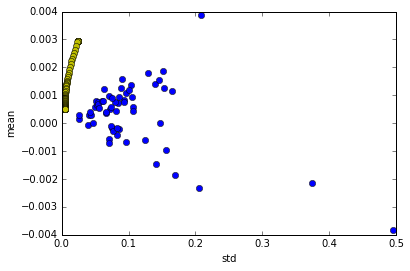

In [178]:
plt.plot(risks, returns, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(opt_risks, opt_returns, 'y-o')

In [170]:
train_data.pct_change()

<class 'pandas.core.panel.Panel'>
Dimensions: 60 (items) x 262 (major_axis) x 6 (minor_axis)
Items axis: A to BIG
Major_axis axis: 2012-01-02 00:00:00+00:00 to 2013-01-01 00:00:00+00:00
Minor_axis axis: open to price

In [63]:
#Manual Operation::

In [64]:


# Load data manually from Yahoo! finance
#start = datetime.datetime(2011, 1, 1, 0, 0, 0, 0, pytz.utc)
#end = datetime.datetime(2012, 1, 1, 0, 0, 0, 0, pytz.utc)
#data = load_bars_from_yahoo(stocks=['AAPL'], start=start, end=end)
data = sp500data['AAPL']\ #only one stock !!!
    [datetime.datetime(2013, 1, 1, 0, 0, 0, 0, pytz.utc):datetime.datetime(2014, 1, 1, 0, 0, 0, 0, pytz.utc)]
        

# Define algorithm
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)

# Create algorithm object passing in initialize and
# handle_data functions
algo_obj = TradingAlgorithm(initialize=initialize, 
                            handle_data=handle_data)

In [43]:
#%%timeit -n1 -r1

# Run algorithm
perf_manual = algo_obj.run(data)

[2015-03-27 02:08:08.827541] INFO: Performance: Simulated 252 trading days out of 252.
[2015-03-27 02:08:08.828138] INFO: Performance: first open: 2013-01-02 14:31:00+00:00
[2015-03-27 02:08:08.828561] INFO: Performance: last close: 2013-12-31 21:00:00+00:00


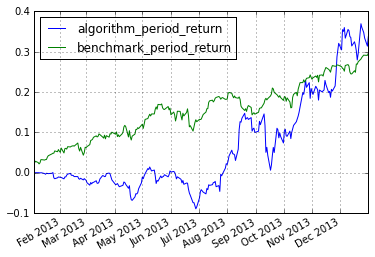

In [45]:
perf_manual.plot(y=['algorithm_period_return', u'benchmark_period_return' ])

In [41]:
perf_manual.keys()

Index([u'AAPL', u'algo_volatility', u'algorithm_period_return', u'alpha', u'benchmark_period_return', u'benchmark_volatility', u'beta', u'capital_used', u'ending_cash', u'ending_value', u'excess_return', u'gross_leverage', u'information', u'long_exposure', u'longs_count', u'max_drawdown', u'net_leverage', u'orders', u'period_close', u'period_label', u'period_open', u'pnl', u'portfolio_value', u'positions', u'returns', u'sharpe', u'short_exposure', u'shorts_count', u'sortino', u'starting_cash', u'starting_value', u'trading_days', u'transactions', u'treasury_period_return'], dtype='object')